## Libraries  Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### 1. Data Loading & Compliation

In [2]:
#Custom dataset formation
def time_frame(start_date,end_date):
    dataset = pd.DataFrame()
    dataset['Date'] = pd.date_range(start= start_date,end= end_date, freq ='1D')
    return dataset

start_date = '01/01/2017'
end_date = '10/01/2022'
date_frame = time_frame(start_date,end_date)
date_frame.head(2)

,Date
0,2017-01-01
1,2017-01-02


#### 1.1 Overall Daily Nasdaq-100 dataset

In [3]:
data_ndx = pd.read_csv('Raw_Data/NDX_100_daily_new.csv')

data_ndx['Date'] = pd.to_datetime(data_ndx['Date'])
date_i_ndx = date_frame.merge(data_ndx, on ='Date', how ='left')

date_i_ndx.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
2097,2022-09-29,11334.57031,11339.91016,11038.94043,11164.78027,11164.78027,4.516630e+09
2098,2022-09-30,11123.11035,11296.16016,10966.95020,10971.21973,10971.21973,4.649710e+09
2099,2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
date_i_ndx.isnull().sum().sort_values(ascending = False)

Open         653
High         653
Low          653
Close        653
Adj Close    653
Volume       653
Date           0
dtype: int64

#### 1.2 US Monthly Unemployment_rate dataset

In [5]:
date_i_ndx['Month_year'] = pd.to_datetime(date_i_ndx['Date']).dt.to_period('M')

data_unemp = pd.read_excel('Raw_Data/Unemployment_rate_monthly.xls')
data_unemp = data_unemp.rename(columns = {'observation_date':'Date', 'UNRATE':'Unemp_rate'})
data_unemp['Month_year'] = pd.to_datetime(data_unemp['Date']).dt.to_period('M')
data_unemp.drop(['Date'], axis =1, inplace = True)
data_unemp.head(3)

,Unemp_rate,Month_year
0,3.4,1948-01
1,3.8,1948-02
2,4.0,1948-03


In [6]:
date_i_ndx_unemp = date_i_ndx.merge(data_unemp, on ='Month_year', how ='left')
date_i_ndx_unemp = date_i_ndx_unemp[['Date','Month_year','Open','High','Low','Close','Adj Close','Volume','Unemp_rate']]
date_i_ndx_unemp.tail(3)

,Date,Month_year,Open,High,Low,Close,Adj Close,Volume,Unemp_rate
2097,2022-09-29,2022-09,11334.57031,11339.91016,11038.94043,11164.78027,11164.78027,4.516630e+09,3.5
2098,2022-09-30,2022-09,11123.11035,11296.16016,10966.95020,10971.21973,10971.21973,4.649710e+09,3.5
2099,2022-10-01,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,3.7


In [7]:
date_i_ndx_unemp.isnull().sum().sort_values(ascending = False)

Open          653
High          653
Low           653
Close         653
Adj Close     653
Volume        653
Date            0
Month_year      0
Unemp_rate      0
dtype: int64

#### 1.3 Daily Brent price per Barrel dataset

In [8]:
col_bo = ['Date', 'COB_price']
data_bo = pd.read_csv('Raw_Data/brent_co_prices_daily.csv',header= 0,names = col_bo, usecols = col_bo, converters = {'Date':str})
data_bo['Date'] = pd.to_datetime(data_bo['Date'])

In [9]:
data_bo.head(4)

,Date,COB_price
0,2012-11-06,109.27
1,2012-11-07,108.21
2,2012-11-08,107.23
3,2012-11-09,108.61


In [10]:
date_i_ndx_unemp_bo = date_i_ndx_unemp.merge(data_bo, on ='Date', how ='left')
date_i_ndx_unemp_bo.tail(3)

,Date,Month_year,Open,High,Low,Close,Adj Close,Volume,Unemp_rate,COB_price
2097,2022-09-29,2022-09,11334.57031,11339.91016,11038.94043,11164.78027,11164.78027,4.516630e+09,3.5,89.41
2098,2022-09-30,2022-09,11123.11035,11296.16016,10966.95020,10971.21973,10971.21973,4.649710e+09,3.5,88.90
2099,2022-10-01,2022-10,NaN,NaN,NaN,NaN,NaN,NaN,3.7,NaN


In [11]:
date_i_ndx_unemp_bo.isnull().sum().sort_values(ascending=False)

Open          653
High          653
Low           653
Close         653
Adj Close     653
Volume        653
COB_price     638
Date            0
Month_year      0
Unemp_rate      0
dtype: int64

#### 1.4 Daily US Covid-19 dataset

In [12]:
#Loading of Covid data
col_cv = ['date','continent','location','total_cases','new_cases','total_deaths', 'new_deaths', 'stringency_index', 'icu_patients', 'hosp_patients', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
data_cd = pd.read_csv('Raw_Data/covid-data.csv', usecols = col_cv)

#Preprocessing of covid data
data_cd = data_cd[(data_cd['continent'] =='North America') & (data_cd['location'] == 'United States')]
data_cd = data_cd.rename(columns = {'date':'Date'})
data_cd['Date'] = pd.to_datetime(data_cd['Date'])
col_d_cv = ['continent','location']
data_cd.drop(col_d_cv, axis =1, inplace = True)

In [13]:
data_cd.tail(5)

,Date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index
219539,2022-10-31,97503019.0,43008.0,1070508.0,123.0,2567.0,21762.0,NaN,NaN,640878616.0,266397317.0,227373599.0,25.89
219540,2022-11-01,97550350.0,47331.0,1070907.0,399.0,NaN,NaN,NaN,NaN,640913400.0,266401911.0,227377753.0,NaN
219541,2022-11-02,97622888.0,72538.0,1071649.0,742.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219542,2022-11-03,97692050.0,69162.0,1072222.0,573.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
219543,2022-11-04,97729653.0,37603.0,1072561.0,339.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
date_i_ndx_unemp_bo_cv = date_i_ndx_unemp_bo.merge(data_cd, on ='Date', how ='left')

In [15]:
date_i_ndx_unemp_bo_cv.head(4)

,Date,Month_year,Open,High,Low,Close,Adj Close,Volume,Unemp_rate,COB_price,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index
0,2017-01-01,2017-01,NaN,NaN,NaN,NaN,NaN,NaN,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-02,2017-01,NaN,NaN,NaN,NaN,NaN,NaN,4.7,56.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-03,2017-01,4900.850098,4928.490234,4884.520020,4911.330078,4911.330078,1.886200e+09,4.7,55.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-04,2017-01,4920.790039,4944.740234,4919.799805,4937.209961,4937.209961,1.883360e+09,4.7,56.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
date_i_ndx_unemp_bo_cv.shape

(2100, 22)

## 2. Data Pre-processing

#### 2.1 Null values Check in dataset

In [17]:
date_i_ndx_unemp_bo_cv.isnull().sum().sort_values(ascending=False)

people_fully_vaccinated    1442
people_vaccinated          1442
total_vaccinations         1442
hosp_patients              1291
icu_patients               1291
tests_per_case             1266
positive_rate              1266
new_deaths                 1156
total_deaths               1154
new_cases                  1117
stringency_index           1116
total_cases                1116
Volume                      653
Adj Close                   653
Close                       653
Low                         653
High                        653
Open                        653
COB_price                   638
Month_year                    0
Unemp_rate                    0
Date                          0
dtype: int64

In [38]:
date_i_ndx_unemp_bo_cv

,Month_year,Open,High,Low,Close,Adj Close,Volume,Unemp_rate,COB_price,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,stringency_index
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,2017-01,NaN,NaN,NaN,NaN,NaN,NaN,4.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-02,2017-01,NaN,NaN,NaN,NaN,NaN,NaN,4.7,56.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,2017-01,4900.850098,4928.490234,4884.520020,4911.330078,4911.330078,1.886200e+09,4.7,55.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,2017-01,4920.790039,4944.740234,4919.799805,4937.209961,4937.209961,1.883360e+09,4.7,56.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,2017-01,4936.350098,4967.899902,4935.339844,4964.950195,4964.950195,1.792610e+09,4.7,56.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-27,2022-09,11411.339840,11502.379880,11175.290040,11271.750000,11271.750000,4.445050e+09,3.5,85.97,96174958.0,61013.0,1057466.0,448.0,2943.0,23655.0,NaN,NaN,622677571.0,264658161.0,225980169.0,25.96
2022-09-28,2022-09,11258.740230,11546.870120,11210.809570,11493.830080,11493.830080,4.556100e+09,3.5,89.55,96261796.0,86838.0,1058769.0,1303.0,2999.0,23556.0,NaN,NaN,623375280.0,264726087.0,226036235.0,25.95
2022-09-29,2022-09,11334.570310,11339.910160,11038.940430,11164.780270,11164.780270,4.516630e+09,3.5,89.41,96346164.0,84368.0,1059462.0,693.0,2996.0,23287.0,NaN,NaN,624056061.0,264791379.0,226091920.0,25.95


#### 2.2 Filling Null values in NDX-100 variables

In [22]:
dd = date_i_ndx_unemp_bo_cv.copy()

In [25]:
dd.Date = pd.to_datetime(dd.Date, format='%Y-%m-%d')
dd = date_i_ndx_unemp_bo_cv[['Date','Month_year','Open','High','Low','Close','Adj Close','total_cases','Unemp_rate', 'new_cases','stringency_index','COB_price']]

def interpolate(dataset, columns):
    dataset[columns]= dataset[columns].interpolate(method=  'linear')
    return dataset
    
col_ndx_interp = ['Adj Close','Close', 'Low', 'High', 'Open','COB_price','new_cases','total_cases','stringency_index']
dd = interpolate(date_i_ndx_unemp_bo_cv,col_ndx_interp)

In [27]:
dd.isnull().sum().sort_values(ascending=False)

people_fully_vaccinated    1442
people_vaccinated          1442
total_vaccinations         1442
hosp_patients              1291
icu_patients               1291
tests_per_case             1266
positive_rate              1266
new_deaths                 1156
total_deaths               1154
new_cases                  1117
stringency_index           1116
total_cases                1116
Volume                      653
Adj Close                     2
Close                         2
Low                           2
High                          2
Open                          2
COB_price                     1
Month_year                    0
Unemp_rate                    0
Date                          0
dtype: int64

#### 2.3 Aggregation of Daily to Weekly Data

In [30]:
dd.set_index('Date', inplace = True)
gg = dd.resample('W').agg({'Open':'first', 'High':'max', 'Low':'min', 'Adj Close':'last', 'Close':'last', 'total_cases': 'last','Unemp_rate': 'last', 'new_cases':'sum','stringency_index':'mean', 'COB_price':'mean'})
gg.reset_index('Date', inplace = True)

In [31]:
gg.isnull().sum().sort_values(ascending=False)

total_cases         160
stringency_index    160
Open                  1
High                  1
Low                   1
Adj Close             1
Close                 1
COB_price             1
Date                  0
Unemp_rate            0
new_cases             0
dtype: int64

In [33]:
gg.fillna(0)

,Date,Open,High,Low,Adj Close,Close,total_cases,Unemp_rate,new_cases,stringency_index,COB_price
0,2017-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4.7,0.0,0.000000,0.000000
1,2017-01-08,4900.850098,5029.113281,4884.520020,5018.959961,5018.959961,0.0,4.7,0.0,0.000000,56.397143
2,2017-01-15,5013.819824,5066.950195,4995.069824,5052.079834,5052.079834,0.0,4.7,0.0,0.000000,55.207143
3,2017-01-22,5044.192383,5085.339844,5029.609863,5064.866862,5064.866862,0.0,4.7,0.0,0.000000,55.088571
4,2017-01-29,5055.970215,5172.430176,5035.490234,5142.240072,5142.240072,0.0,4.7,0.0,0.000000,55.465714
...,...,...,...,...,...,...,...,...,...,...,...
296,2022-09-04,12488.459960,12594.339840,11982.169920,12054.875000,12054.875000,94760242.0,3.5,550600.0,24.225714,95.473929
297,2022-09-11,12178.042722,12705.363283,11928.809570,12689.243167,12689.243167,95257606.0,3.5,497364.0,25.495714,91.040000
298,2022-09-18,12649.230470,12752.830080,11710.259770,11922.639647,11922.639647,95664107.0,3.5,406501.0,25.988571,90.861786
299,2022-09-25,11753.599610,12062.519530,11169.660160,11273.153643,11273.153643,96068353.0,3.5,404246.0,25.968571,87.226071


#### 2.4 Additional Filters

In [34]:
gg= gg[gg['Date']>'2017-01-02']

#### 2.5 Saving Pre-processed Data Files

In [35]:
gg.set_index('Date', inplace = True)
gg.to_csv('Process_Data/NDX_100_daily_processed_w_covid_final.csv')
gg.reset_index('Date', inplace = True)

### 3. Plot Charts for observing Trends

In [36]:
gg.shape

(300, 11)

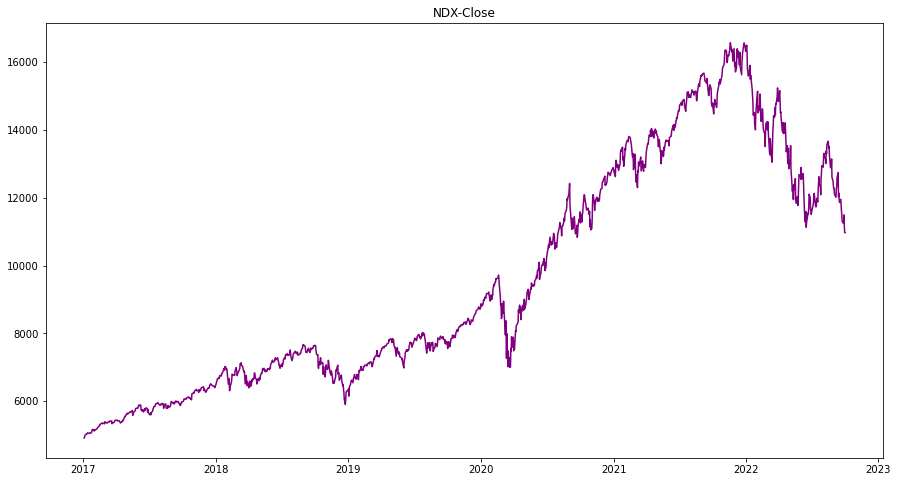

In [39]:
# setting the plot size
date_i_ndx_unemp_bo_cv.reset_index('Date', inplace = True)
plt.rcParams['figure.figsize']=(15,8)
plt.plot(date_i_ndx_unemp_bo_cv['Date'],date_i_ndx_unemp_bo_cv['Close'], color='Purple')
# add the title of our plot as NDX-Close
plt.title('NDX-Close')

# print the plot
plt.show()

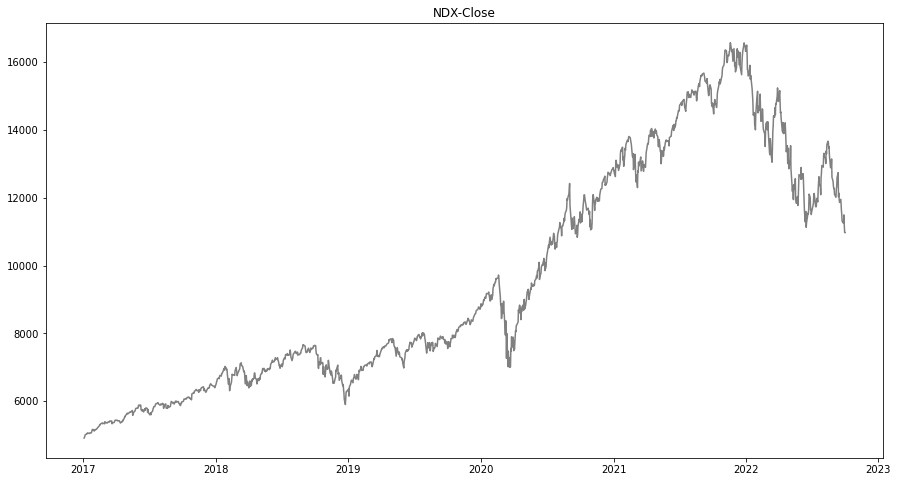

In [40]:
# setting the plot size
plt.rcParams['figure.figsize']=(15,8)
plt.plot(dd['Date'],dd['Close'], color='Grey')
# add the title of our plot as NDX-Close
plt.title('NDX-Close')

# print the plot
plt.show()

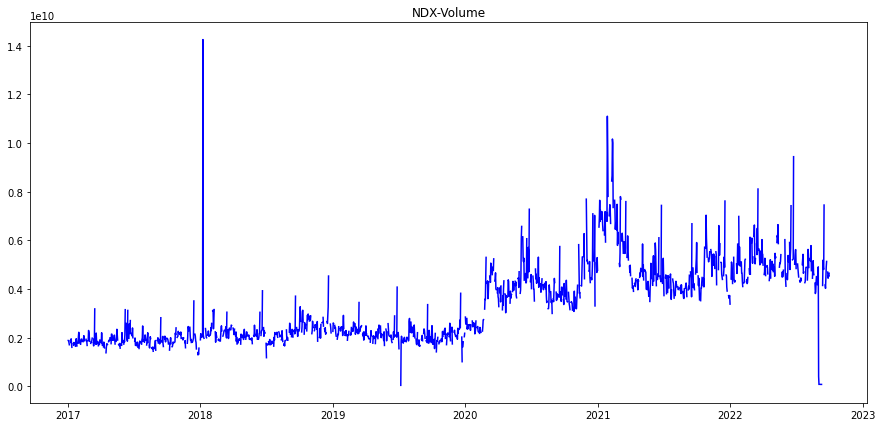

In [41]:
# setting the plot size
plt.rcParams['figure.figsize']=(15,7)
# on our data, impute the missing values using rolling window method
# plot the complete dataset
plt.plot(dd['Date'], dd['Volume'], color='blue')
# add the tittle of our plot as Linear interpolation
plt.title('NDX-Volume')
# print the plot
plt.show()

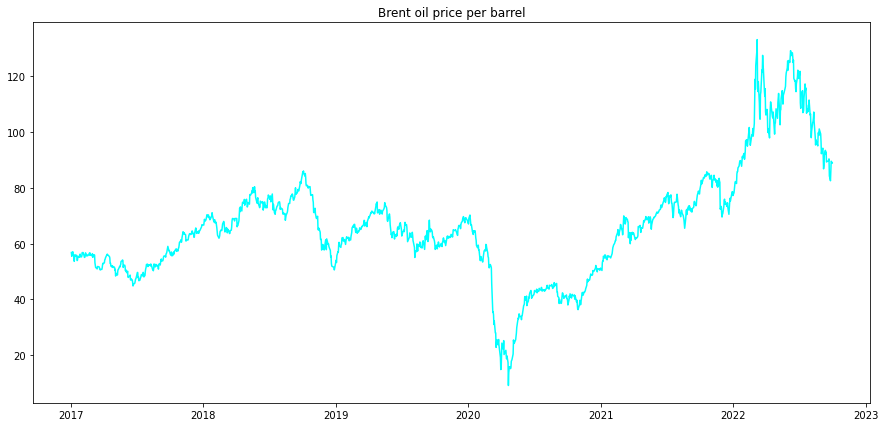

In [45]:
# setting the plot size
plt.rcParams['figure.figsize']=(15,7)
# on our data, impute the missing values using rolling window method
#data_ndx_final['Close']= data_ndx_final['Close'].interpolate(method='linear')
# plot the complete dataset
plt.plot(dd['Date'],dd['COB_price'], color='Cyan')
# add the tittle of our plot as Linear interpolation
plt.title('Brent oil price per barrel')
# print the plot
plt.show()

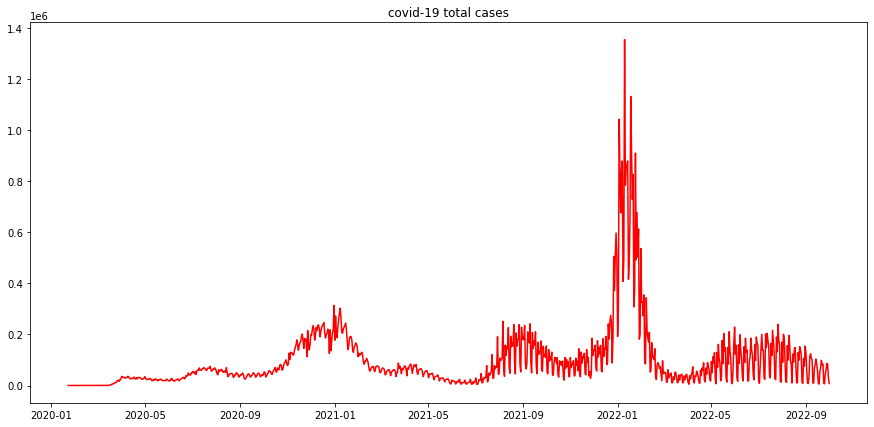

In [46]:
# setting the plot size
plt.rcParams['figure.figsize']=(15,7)
# on our data, impute the missing values using rolling window method
#data_ndx_final['Close']= data_ndx_final['Close'].interpolate(method='linear')
# plot the complete dataset
plt.plot(date_i_ndx_unemp_bo_cv['Date'],date_i_ndx_unemp_bo_cv['new_cases'], color='Red')
# add the tittle of our plot as Linear interpolation
plt.title('covid-19 total cases')
# print the plot
plt.show()